# Questions courantes sur la science des données

Notre objectif dans ce projet est d'utiliser [Data Science Stack Exchange](https://datascience.stackexchange.com/) pour déterminer le contenu qu'une entreprise de formation en science des données doit créer, en fonction de l'intérêt par sujet.

### Stack Exchange

#### Quels types de questions sont les bienvenus sur ce site?

Dans la [section](https://datascience.stackexchange.com/help/asking) du centre d'aide de DSSE sur les questions, nous pouvons lire que nous devrions:

   -  Évitez les questions subjectives.
   -  Posez des questions pratiques sur Data Science - il existe des sites adéquats pour les questions théoriques.
   -  Posez des questions spécifiques.
   -  Faites des questions pertinentes pour les autres.
   
Toutes ces caractéristiques, si elles sont utilisées, devraient être des attributs utiles à notre objectif.

Dans le centre d'aide, nous avons également appris qu'en plus des sites mentionnés dans la section Apprendre, il existe deux autres sites pertinents:

   -  [Open Data](https://opendata.stackexchange.com/help/on-topic) (Demandes d'ensembles de données)
   -  [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Progiciels et algorithmes en mathématiques appliquées)
   
#### En quoi, à part les questions, se subdivise [la page d'accueil](https://datascience.stackexchange.com/) de DSSE? 

Sur la page d'accueil, nous pouvons voir que nous avons quatre sections:
   - Questions - une liste de toutes les questions posées;
   - Tags - une liste de Tags (mots clés ou étiquettes qui catégorisent les questions);
   - Users  - une liste d'utilisateurs;
   - Unanswered  - une liste de questions sans réponse;
   
Le système de tag utilisé par Stack Exchange ressemble exactement à ce dont nous avons besoin pour résoudre ce problème car il nous permet de quantifier le nombre de questions posées sur chaque sujet.

Une autre chose que nous pouvons apprendre en explorant le centre d'aide, c'est que les sites de Stack Exchange sont fortement modérés par la communauté, cela nous donne une certaine confiance dans l'utilisation du système de tag pour tirer des conclusions.

### Explorateur de données Stack Exchange

En parcourant les noms des tables, quelques-unes se démarquent comme étant pertinentes pour notre objectif:
  -  Posts
  -  PostTags
  -  Tags
  -  TagSynonyms

L'exécution de quelques requêtes exploratoires nous amène à concentrer nos efforts sur la table Posts. Par exemple, le tableau des Tags semblait très prometteur car il nous indique combien de fois chaque Tag a été utilisée, mais il n'y a aucun moyen de dire simplement à partir de cela si l'intérêt pour ces tags est récent ou appartient au passé.

| Id      | TagName | Count | ExcerptPostId | WikiPostId     |
| :---:        |    :----:   |    :----:   |    :----:   |          :---: |
|2 |	machine-learning |	6919 |	4909 |	4908|
|46 |	python |	3907 |	5523 |	5522|
|81 |	neural-network| 	2923 |	8885 	|8884|
|194 	|deep-learning |	2786 |	8956 	|8955|
|77 	|classification |	1899 |	4911 	|4910|
|324 	|keras |	1736 |	9251 |	9250|
|128 |	scikit-learn |	1303 |	5896 |	5895|
|321 |	tensorflow |	1224 |	9183 |	9182|
|47| 	nlp |	1162 |	147 |	146|
|24 |	r |	1114 	|49 |	48|

### Obtenir les données

Pour obtenir les données pertinentes, nous exécutons la requête suivante.
```
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
 ```
Voici à quoi ressemblent les premières lignes:

| Id      | PostTypeId | CreationDate | Score | ViewCount  | Tags  | AnswerCount  | FavoriteCount  |
| :---:        |    :----:   |    :----:   |    :----:   |  :---: |  :---: |  :---: |
|44419 |	1 |	2019-01-23 09:21:13 |	1 	|21 |	```<machine-learning><data-mining>```| 0 |
|44420 |	1 |	2019-01-23 09:34:01 |	0 |	25 |```	<machine-learning><regression><linear-regression><regularization>```| 0 |
|44423 |	1 |	2019-01-23 09:58:41 |	2 |	1651 |```	<python><time-series><forecast><forecasting>``` |	0 |
|44427 |	1 |	2019-01-23 10:57:09 |	0 |	55 |	```<machine-learning><scikit-learn><pca> ```|	1 |	
|44428 |	1 |	2019-01-23 11:02:15 |	0 |	19 |```	<dataset><bigdata><data><speech-to-text> ```|0 |

## Explorer les données

Nous pouvons lire les données tout en nous assurant immédiatement que CreationDate sera stocké en tant qu'objet datetime:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


Nous voyons que seul FavoriteCount a des valeurs manquantes. Une valeur manquante dans cette colonne signifie probablement que la question n'était pas présente dans la liste des favoris des utilisateurs, nous pouvons donc remplacer les valeurs manquantes par zéro.

Les types semblent adéquats pour chaque colonne, cependant, après avoir rempli les valeurs manquantes sur FavoriteCount, il n'y a aucune raison de stocker les valeurs sous forme de Float.

Puisque l'objet dtype est un type fourre-tout, voyons quels sont les types des objets dans les questions ["Tags"].

In [4]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

Nous voyons que chaque valeur de cette colonne est une chaîne. Sur Stack Exchange, chaque question ne peut avoir qu'un maximum de cinq tags ([source](do-i-correctly-tag-my-questions/18879#18879)), donc une façon de traiter cette colonne est de créer cinq colonnes dans les questions appelées Tag1, Tag2, Tag3, Tag4 et Tag5 et de remplir les colonnes avec les tags dans chaque ligne.

Cependant, puisque cela n'aide pas à relier les tags d'une question à une autre, nous les garderons simplement sous forme de liste.

## Nettoyage des données

Nous allons commencer par corriger FavoriteCount.

In [5]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

Modifions maintenant les tags pour faciliter le travail.

In [6]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1623,57568,2019-08-14 19:45:53,2,111,"[machine-learning, random-forest, decision-tre...",2,0
7405,43910,2019-01-13 10:23:58,4,92,"[deep-learning, cnn]",1,0
8367,55072,2019-07-04 16:22:07,0,7,"[machine-learning, statistics, feature-selecti...",0,0


## Les plus utilisés et les plus consultés

Nous commencerons par compter le nombre de fois que chaque tag a été utilisé

In [7]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

Pour une esthétique améliorée, transformons tag_count en dataframe.

In [8]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)


Trions maintenant ce dataframe par Count et visualisons les 20 meilleurs résultats.

In [9]:
most_used = tag_count.sort_values(by="Count", ascending=False).head(20)
most_used

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


Le seuil de 20 est arbitraire et nous pouvons expérimenter avec d'autres, cependant, la popularité des tags diminue rapidement, donc regarder ces tags devrait être suffisant pour nous aider à atteindre notre objectif. Visualisons ces données.

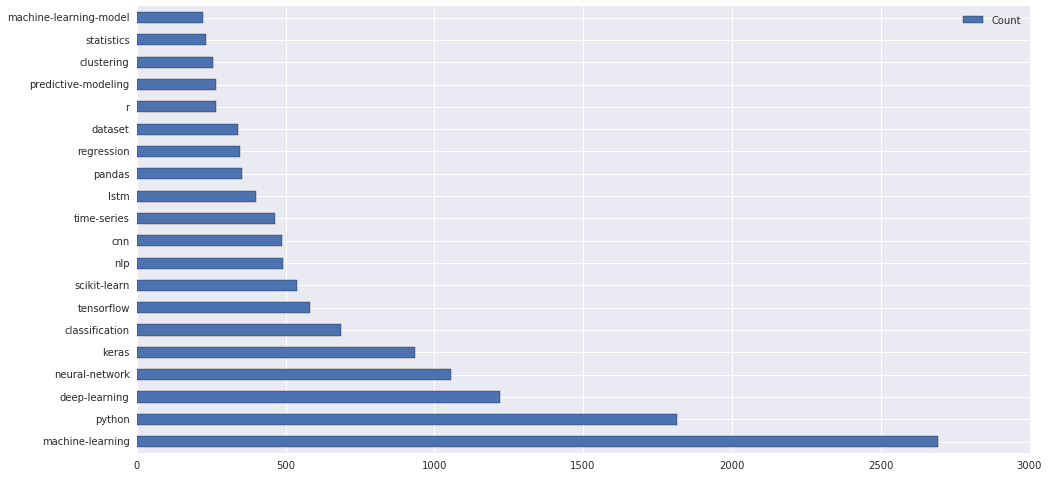

In [10]:
most_used.plot(kind="barh", figsize=(16,8))

Certaines tags sont très, très larges et sont peu susceptibles d'être utiles; par exemple: python, dataset, r. Avant d'étudier les tags un peu plus en profondeur, répétons le même processus pour les vues.

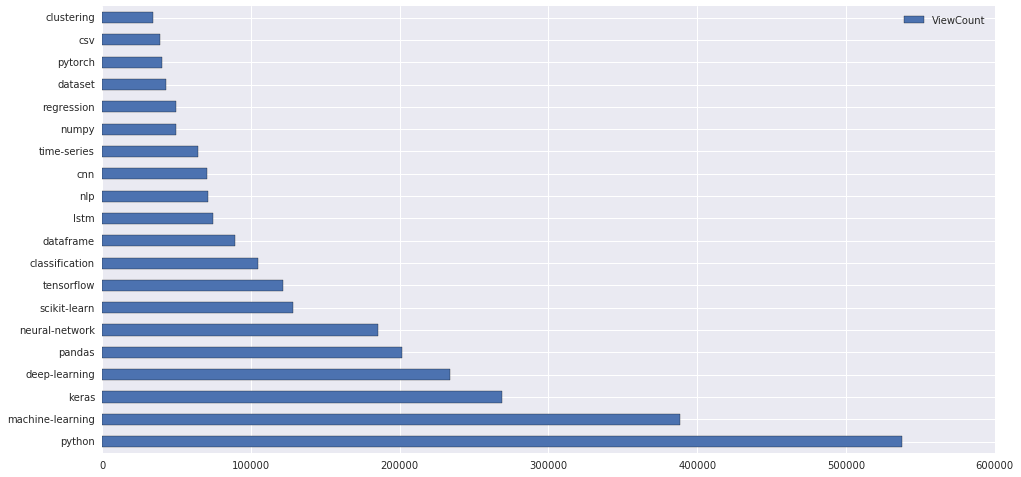

In [11]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount", ascending=False).head(20)

most_viewed.plot(kind="barh", figsize=(16,8))


Voyons-les côte à côte.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fe8e932b0>],
      dtype=object)

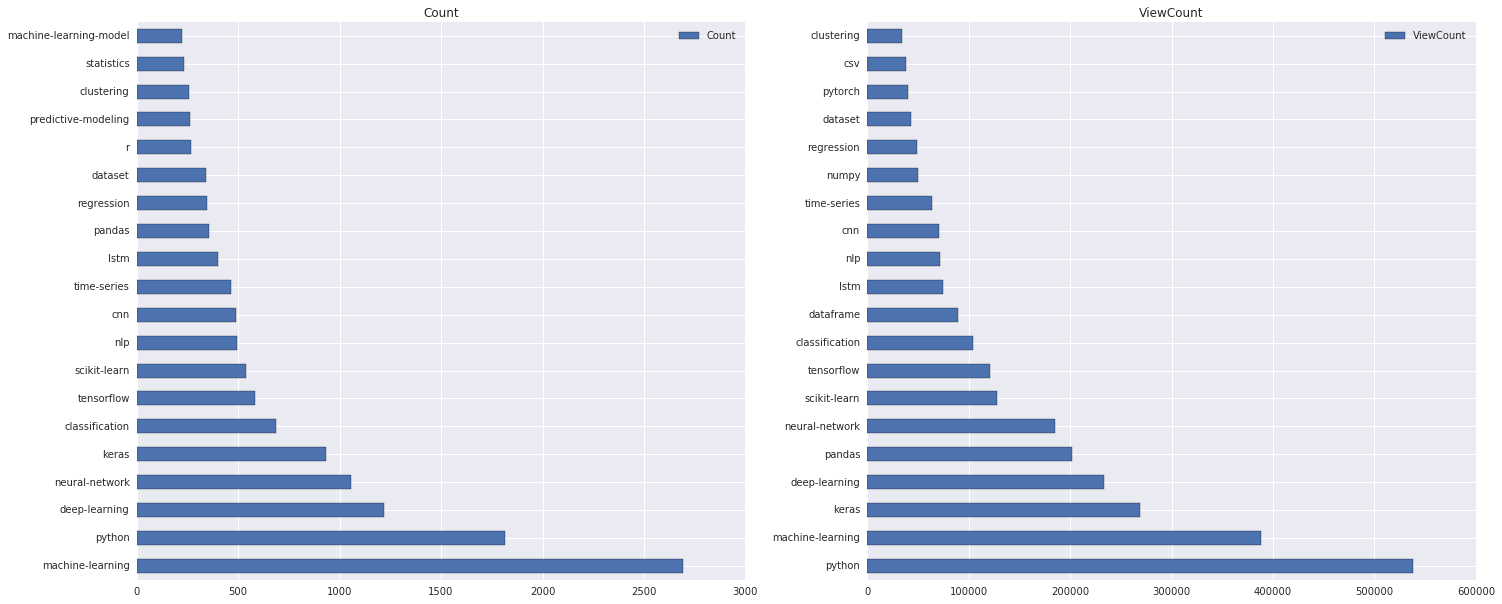

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [32]:
in_viewed = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed.head(5)

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0


## Relations entre les Tags

Une façon d'essayer d'évaluer comment les paires des tags sont liées les unes aux autres est de compter le nombre de fois que chaque paire apparaît ensemble. Faisons cela.

Nous commencerons par créer une liste de toutes les tags.

In [14]:
all_tags = list(tag_count.index)

We'll now create a dataframe where each row will represent a tag, and each column as well. Something like this:

|       | tag1 | tag2 | tag3 |
| ----------- | ----------- |----------- |----------- |
|** tag1  **    |        |  |
|** tag2 **  |         |  |
|** tag3 **  |         |  |

In [15]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,naive-bayes-classifier,redshift,ai,ggplot2
naive-bayes-classifier,NaN,NaN,NaN,NaN
redshift,NaN,NaN,NaN,NaN
ai,NaN,NaN,NaN,NaN
ggplot2,NaN,NaN,NaN,NaN


Nous allons maintenant remplir ce dataframe avec des zéros et ensuite, pour chaque liste de tags dans les questions ["Tags"], nous incrémenterons les tags intermédiaires d'une unité. Le résultat final sera une dataframe qui, pour chaque paire de tags, nous indique combien de fois elles ont été utilisées ensemble.

In [16]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [17]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


Les cellules colorées en jaune nous indiquent que time-series a été utilisée avec r 22 fois. Les valeurs en bleu nous indiquent combien de fois chacun des tags a été utilisé. Nous avons vu précédemment que la machine learning a été utilisés 2693 fois et nous le confirmons maintenant.

Il est difficile pour un humain de comprendre ce qui se passe dans cette dataframe. Créons une heatmap. Mais avant de le faire, débarrassons-nous des valeurs en bleu, sinon les couleurs seront trop faussées.

In [18]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

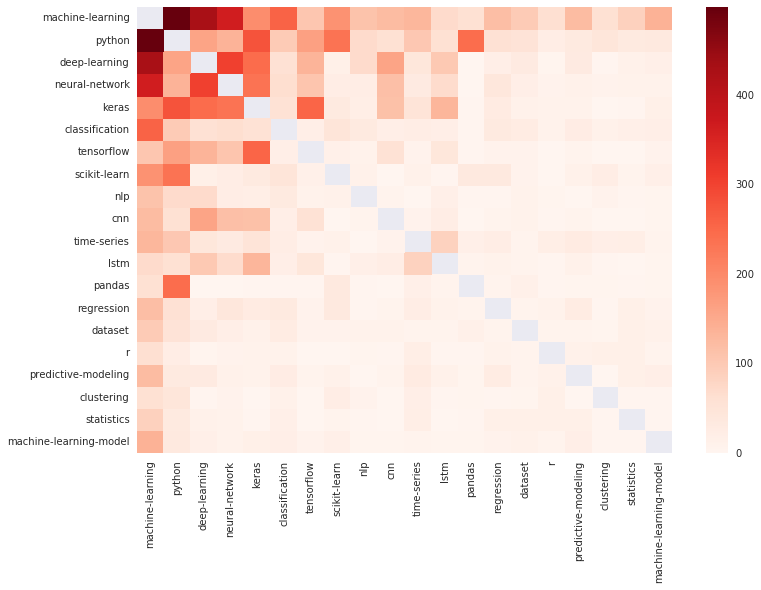

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Reds", annot=False)

Les tags les plus utilisés semblent également avoir les relations les plus fortes, comme le montre la concentration sombre dans le coin haut gauche. Cependant, cela pourrait simplement être dû au fait que chacun de ces tags est beaucoup utilisé, et finit donc par être  ensemble beaucoup sans même avoir une relation forte entre eux.

Une manifestation plus intuitive de ce phénomène est la suivante. Beaucoup de gens achètent du pain, beaucoup de gens achètent du papier hygiénique, donc ils finissent par être achetés ensemble, mais acheter l'un d'eux n'augmente pas les chances d'acheter l'autre.

Un autre inconvénient de cette tentative est qu'elle ne regarde que les relations entre les paires de tags et non entre plusieurs groupes de tags. Par exemple, il se peut que, lorsqu'ils sont utilisés ensemble, dataset  et scikit-learn aient une relation «forte» avec pandas, mais chacun par lui-même n'est pas.


Alors, comment attaquer ces deux problèmes? Il existe une puissante technique d'exploration de données qui nous permet de gérer cela: les règles d'association. Les règles d'association nous permettent de repérer de manière analytique des relations telles que «les gens qui achètent du lait achètent également des œufs». De plus, nous pouvons également mesurer la force de ces relations sur plusieurs fronts: à quel point la relation est commune, à quel point elle est forte et à quel point les composants de la relation sont indépendants (le papier hygiénique et le pain sont probablement plus indépendants que les œufs et le lait).

### Entrez la connaissance du domaine

Keras, scikit-learn, TensorFlow sont toutes des bibliothèques Python qui permettent à leurs utilisateurs d'utiliser le deep learning (un type de réseau neuronal).

La plupart des tags principals sont tous intimement liés au deep learning. Si nous voulons être très précis, nous pouvons suggérer la création de contenu Python qui utilise deep learning pour les problèmes de classification (et d'autres variantes de cette suggestion).

En un coup d'œil, une personne ayant une connaissance suffisante du domaine peut dire que le sujet le plus populaire en ce moment, comme le montre notre analyse, est le deep learning.

Lisons le fichier dans une dataframe appelée all_q. Nous analyserons les dates au moment de la lecture

In [33]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [34]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

Avant de décider quelles questions doivent être classées comme des questions de deep learning, nous devons décider quelles tags sont des tags de deep learning.

La définition de ce qui constitue un tag de deep learning que nous utiliserons est: un tag qui appartient à la liste ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

Cette liste a été obtenue en examinant toutes les balises dans most_used et en identifiant celles qui avaient un rapport avec le deep learning.

Nous allons maintenant créer une fonction qui attribue 1 aux questions de deep learning et 0 autrement.

In [35]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [36]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [39]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
12309,30267,2018-04-13 10:48:43,"[machine-learning, data-mining, dataset, reinf...",0
15409,53084,2019-06-02 13:08:07,"[machine-learning, neural-network, deep-learni...",1
3304,38548,2018-09-20 14:18:36,"[python, time-series, lstm, forecasting]",1
10077,8704,2015-11-04 04:25:31,[cosine-distance],0
7726,18313,2017-04-12 21:30:11,"[machine-learning, regression, probability]",0


La data-science-technologie n'est pas quelque chose d'aussi dynamique pour mériter un suivi quotidien, hebdomadaire ou même mensuel.

Suivons le trimestriellement.

Comme nous n'avons pas toutes les données pour le premier trimestre de 2020, nous allons nous débarrasser de ces datas

In [40]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

Créons une colonne qui identifie le trimestre au cours duquel une question a été posée.

In [41]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [42]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


Pour la dernière partie, nous allons regrouper par trimestre et:

   -  Comptez le nombre de questions de deep learning.
   -  Comptez le nombre total de questions.
   -  Calculez le rapport entre les deux nombres ci-dessus.

In [43]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
12,17Q2,226,647,0.349304
7,16Q1,110,516,0.213178
5,15Q3,45,311,0.144695
21,19Q3,941,2394,0.393066
20,19Q2,935,2393,0.390723


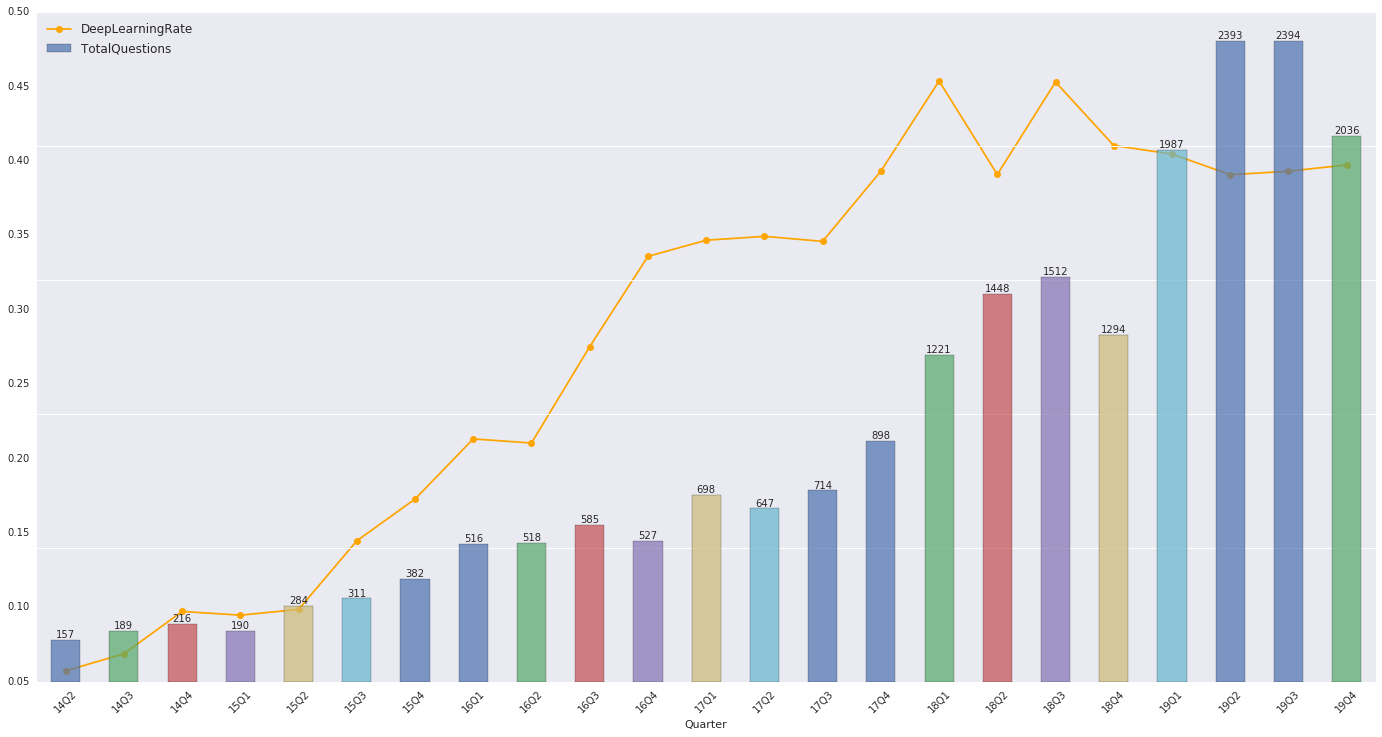

In [72]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

Il semble que les questions de deep learning aient été une tendance à forte croissance depuis le début de DSSE et il semble qu'elle plafonne.